In [3]:
# Аналітичні розрахунки(наближення прямою)
import numpy as np

def func(x):
    return 2*x + np.cos(2*x)

x = np.arange(0.1, 1.1, 0.1)
y = func(x)

x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x_squared_mean = np.mean(x**2)
x_cubic_mean = np.mean(x**3)
x_forth_mean = np.mean(x**4)
xy_squared_mean = np.mean((x**2) * y)
a1 = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
a0 = y_mean - a1 * x_mean

print("Лінйна апроксимація:")
print(f"a1: {a1:.2f}")
print(f"a0: {a0:.2f}")
print(f"f(x) ≈ {a1:.2f}x + {a0:.2f} ")

Лінйна апроксимація:
a1: 0.39
a0: 1.27
f(x) ≈ 0.39x + 1.27 


In [4]:
# Аналітичні розрахунки(наближення параболою)
import numpy as np
def func(x):
   return 2*x + np.cos(2*x)

x = np.arange(0.1, 1.1, 0.1)
y = func(x)

x_bar = np.mean(x)
y_bar = np.mean(y)
x_squared_bar = np.mean(x**2)
x_cubed_bar = np.mean(x**3)
x_fourth_bar = np.mean(x**4)
xy_bar = np.mean(x * y)
xy_squared_bar = np.mean((x**2) * y)

A = np.array([[1, x_bar, x_squared_bar],
              [x_bar, x_squared_bar, x_cubed_bar],
              [x_squared_bar, x_cubed_bar, x_fourth_bar]])

B = np.array([y_bar, xy_bar, xy_squared_bar])

coefficients = np.linalg.solve(A, B)
a0, a1, a2 = coefficients
print("Квадратична апроксимація:")
print(f"a0: {a0:.2f}")
print(f"a1: {a1:.2f}")
print(f"a2: {a2:.2f}")
print(f"f(x) ≈ {a2:.2f}x^2+ {a1:.2f}x + {a0:.2f}")

Квадратична апроксимація:
a0: 1.08
a1: 1.32
a2: -0.85
f(x) ≈ -0.85x^2+ 1.32x + 1.08


x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y: [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
Коефіцієнти для лінійної апроксимації:
a1: 0.39, a0: 1.27
f(x) ≈ 0.39x + 1.27


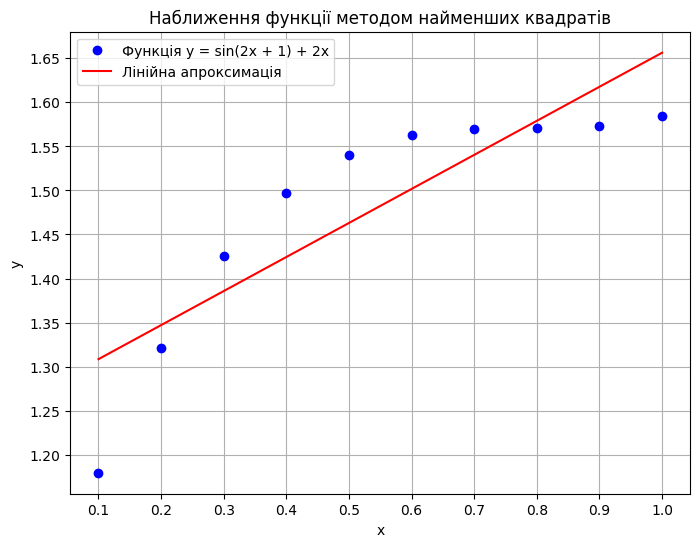

In [2]:
#МНК наближення прямою
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 2*x + np.cos(2*x)
x = np.arange(0.1, 1.1, 0.1)
y = func(x)

print("x:", x)
print("y:", y)

A_linear = np.vstack([x, np.ones(len(x))]).T
a_linear, c_linear = np.linalg.lstsq(A_linear, y, rcond=None)[0]
linear_approximation = a_linear * x + c_linear

print("Коефіцієнти для лінійної апроксимації:")
print(f"a1: {a_linear:.2f}, a0: {c_linear:.2f}")
print(f"f(x) ≈ {a_linear:.2f}x + {c_linear:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Функція y = sin(2x + 1) + 2x", marker="o", linestyle=" ", color="blue")
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Наближення функції методом найменших квадратів")
plt.plot(x, linear_approximation, label=f"Лінійна апроксимація ", color="red")
plt.legend()
plt.grid(True)
plt.show()

x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y: [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
Коефіцієнти для лінійної апроксимації:
a2: -0.85,a1: 1.32,a0: 1.08
f(x) ≈ -0.85x^2 + 1.32x + 1.08


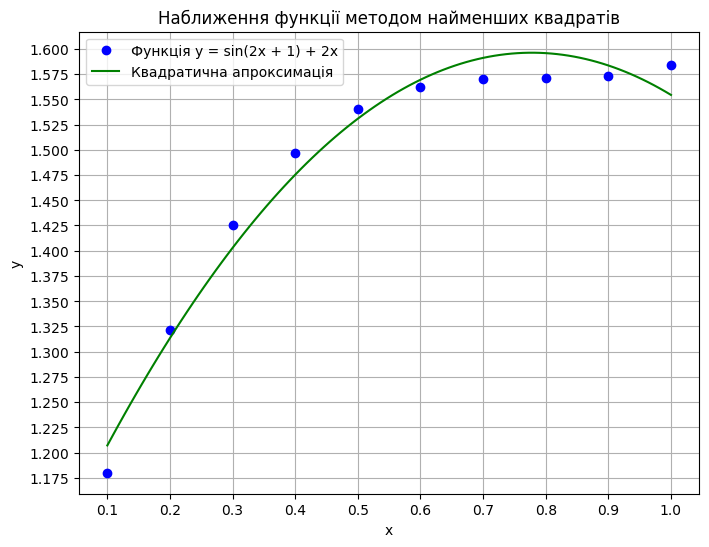

In [1]:
#МНК наближення параболою
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def func(x):
    return 2*x + np.cos(2*x)

x = np.arange(0.1, 1.1, 0.1)
y = func(x)
print("x:", x)
print("y:", y)

def quadratic_function(a, x):
    return a[0] * x**2 + a[1] * x + a[2]

def quadratic_approximation(x, y):
    def fun(a, x, y):
        return quadratic_function(a, x) - y
    a0 = np.ones(3) 
    parabola_approx = least_squares(fun, a0, args=(x, y))
    return parabola_approx.x

a_quad = quadratic_approximation(x, y)
x_p = np.linspace(min(x), max(x), 100)
y_p = quadratic_function(a_quad, x_p)
print("Коефіцієнти для лінійної апроксимації:")
print(f"a2: {a_quad[0]:.2f},a1: {a_quad[1]:.2f},a0: {a_quad[2]:.2f}")
print(f"f(x) ≈ {a_quad[0]:.2f}x^2 + {a_quad[1]:.2f}x + {a_quad[2]:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Функція y = sin(2x + 1) + 2x", marker="o", linestyle=" ", color="blue")
plt.plot(x_p, quadratic_function(a_quad, x_p), label=f"Квадратична апроксимація", color="green")
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Наближення функції методом найменших квадратів")
plt.legend()
plt.grid(True)
plt.show()

# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

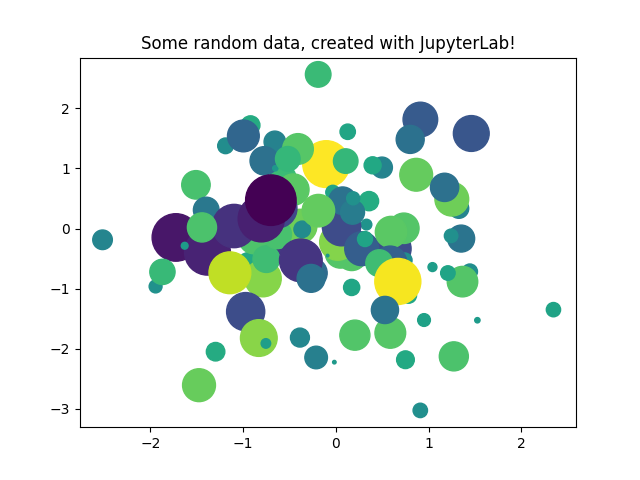

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.